<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Unlocking Diwali Sales Insights: EDA**


In this lab, we will analyze the sales data from Diwali to uncover insights into consumer behavior and purchasing trends during this festive season. We will explore various aspects, such as total orders by zone and sales by product category, to understand which regions and products performed best. By the end of this analysis, we aim to identify key trends that can inform future marketing strategies and inventory management for the Diwali season.


This analysis will help us **understand the factors driving sales** during Diwali and **provide actionable insights** for optimizing sales and personalized marketing strategies in future festive periods.

## **Table of Contents**

1. [Objectives](#Objectives)
2. [Setup](#Setup)
   1. [Installing Required Libraries](#Installing-Required-Libraries)
   2. [Importing Required Libraries](#Importing-Required-Libraries)
   3. [Defining Helper Functions](#Defining-Helper-Functions)
3. [Downloading Diwali Sales Data](#Downloading-Diwali-Sales-Data)
4. [Loading the Diwali Sales Data](#Loading-the-Diwali-Sales-Data)
5. [Checking DataFrame Structure and Column Information](#Checking-DataFrame-Structure-and-Column-Information)
6. [Summarizing Dataset Statistics](#Summarizing-Dataset-Statistics)
7. [Calculating Unique Customers](#Calculating-Unique-Customers)
8. [Identifying Unique States](#Identifying-Unique-States)
9. [Calculating Missing Values](#Calculating-Missing-Values)
10. [Dropping Unusable Columns](#Dropping-Unusable-Columns)
11. [Removing Missing Values](#Removing-Missing-Values)
12. [State Count Visualization](#State-Count-Visualization)
13. [Insights from State Distribution](#Insights-from-State-Distribution)
14. [Total Sales per State](#Total-Sales-per-State)




### Objectives

After completing this lab, you will be able to:

- Use **Diwali sales data analysis** to solve **questions related to consumer purchasing behavior and trends during the festive season**.
- Analyze **total orders by geographic zone** to identify regions with the highest sales and optimize marketing strategies accordingly.
- Examine **sales by product category** to determine which products are most popular during Diwali, informing inventory management and promotional efforts.
- Utilize **data visualization techniques** to effectively communicate findings and insights from the sales data.


----


### Downloading Diwali sales data

In this step, we will download the Diwali sales data, which will serve as the foundation for our analysis. This dataset contains valuable information regarding sales transactions during the Diwali festival, allowing us to explore consumer behavior, product trends, and sales performance across different categories and regions.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/MpykN-nosN1Sn19AVgzEOg/Diwali-Sales-Data.csv

--2025-02-20 04:18:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/MpykN-nosN1Sn19AVgzEOg/Diwali-Sales-Data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 1033233 (1009K) [text/csv]
Saving to: ‘Diwali-Sales-Data.csv’

Diwali-Sales-Data.c 100%[===================>]   1009K  --.-KB/s    in 0.01s   

2025-02-20 04:18:31 (95.0 MB/s) - ‘Diwali-Sales-Data.csv’ saved [1033233/1033233]



## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries


In [2]:
!pip install pandas numpy matplotlib seaborn plotly requests scikit-learn | tail -n 1

### Importing required libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

## Loading the Diwali sales data

To begin our analysis, we will load the Diwali sales data from the CSV file.


In [4]:
df = pd.read_csv('Diwali-Sales-Data.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Here's a brief description of each column in the data set:

1. **User_ID**: Unique identifier for each customer, used to differentiate individual buyers.

2. **Cust_name**: Name of the customer, providing a human-readable identifier and allowing for personalization in analysis.

3. **Product_ID**: Unique identifier for each product, used to track and analyze product-specific purchasing behavior.

4. **Gender**: Customer's gender, with potential values 'F' for Female and 'M' for Male, which can be used in demographic analysis.

5. **Age Group**: Age category of the customer, grouped in ranges like "0-17," "26-35," etc., allowing age-based segmentation and analysis.

6. **Age**: Exact age of the customer, offering more granular demographic data compared to age group.

7. **Marital_Status**: Marital status of the customer, with '0' representing Not Married and '1' representing Married, useful for segmentation based on family demographics.

8. **State**: The state in which the customer resides, providing geographical data for regional analysis.

9. **Zone**: The region or zone within India (for example, Southern, Western) where the state is located, used to group data by larger geographical areas.

10. **Occupation**: Type of occupation of the customer, such as Healthcare, Construction, etc., which can be valuable for profiling and segmentation based on profession.

11. **Product_Category**: General category of the product, like "Auto" or "Food Processing," allowing analysis of purchasing behavior by product type.

12. **Orders**: Number of units of a product ordered by the customer, indicating purchasing volume.

13. **Amount**: Total monetary amount spent on the orders, providing a basis for revenue and spending analysis.

14. **Status**: Status of the order (for example, completed, pending), which could provide insights into order fulfillment and customer experience, though values are currently missing in this sample.

15. **Unnamed1**: Likely an extraneous or placeholder column without relevant data, possibly from a CSV import. It may need to be removed for clean data analysis.


#### Checking DataFrame structure and column information
To get an overview of the dataset, we’ll use df.info() to display the number of entries, column names, data types, and any missing values. This helps us understand the structure of the dataset, identify which columns might need data cleaning, and get a quick view of the dataset’s size and memory usage.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### Summarizing dataset statistics
Using df.describe() provides statistical insights into the numeric columns of the dataset. This is useful for understanding the distribution, central tendencies, and spread of data, as well as for detecting any potential outliers.


In [7]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


##### Key insights
This dataset shows a diverse age group with both budget and high-spending customers, moderate repeat purchases, and a nearly balanced split between married and unmarried customers. Great for segmenting customers by age and spending!


##### Now, we are calculating the total number of unique customers in our dataset by checking for unique entries in the User_ID column.


In [8]:
df['User_ID'].nunique()

3755

##### Now, we are identifying the unique states represented in the dataset by checking distinct values in the State column.


In [9]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [10]:
df['State'].nunique()

16

##### The dataset includes 16 unique states, reflecting a broad geographic distribution of orders.


##### Now, we’re calculating the total number of missing values in each column to understand data completeness.


In [11]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

- **Amount** column has 12 missing values, which may require filling or imputation to maintain data integrity for analyses involving monetary amounts.
- **Status** and **unnamed1** columns have 11,251 missing values, indicating they are completely null in the dataset. Therefore, we will remove these columns as they do not provide usable data.


Now we are dropping the Status and unnamed1 columns from the DataFrame.


In [12]:
df.drop(['Status', 'unnamed1'], inplace = True, axis = 1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


Now we are removing any rows in the DataFrame that contain missing values. Removing missing values is crucial because incomplete data can lead to inaccurate insights, skewed results, and unreliable conclusions. 


In [13]:
df.dropna(inplace=True)

### State count visualization

We are calculating the count of entries for each state in the dataset to understand the distribution of records across different geographical locations. This helps identify which states have a higher volume of customer engagement or activity. We will visualize this information using a bar chart.


<Axes: xlabel='State'>

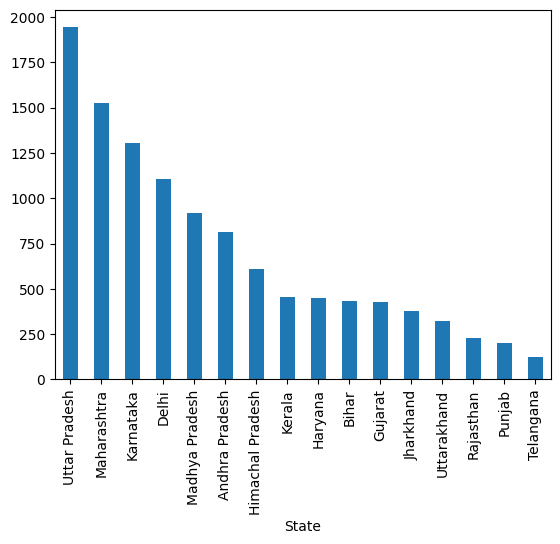

In [14]:
state_count = df['State'].value_counts()
state_count.plot(kind = 'bar')

### Insights from state distribution

- **Uttar Pradesh** leads with the highest entries (1944), followed by **Maharashtra** (1525) and **Karnataka** (1304), indicating strong market presence.
- Moderate counts in **Delhi** (1104) and **Madhya Pradesh** (921) suggest opportunities for growth.
- States like **Telangana** (125) and **Punjab** (200) have lower engagement, indicating potential areas for targeted marketing efforts.
- This distribution can guide resource allocation and marketing strategies to enhance customer engagement across regions.


### Total sales per state


Now we are calculating the total sales amount for each state in the dataset to understand the sales distribution across different geographical locations. This analysis helps identify which states contribute the most to overall sales performance.


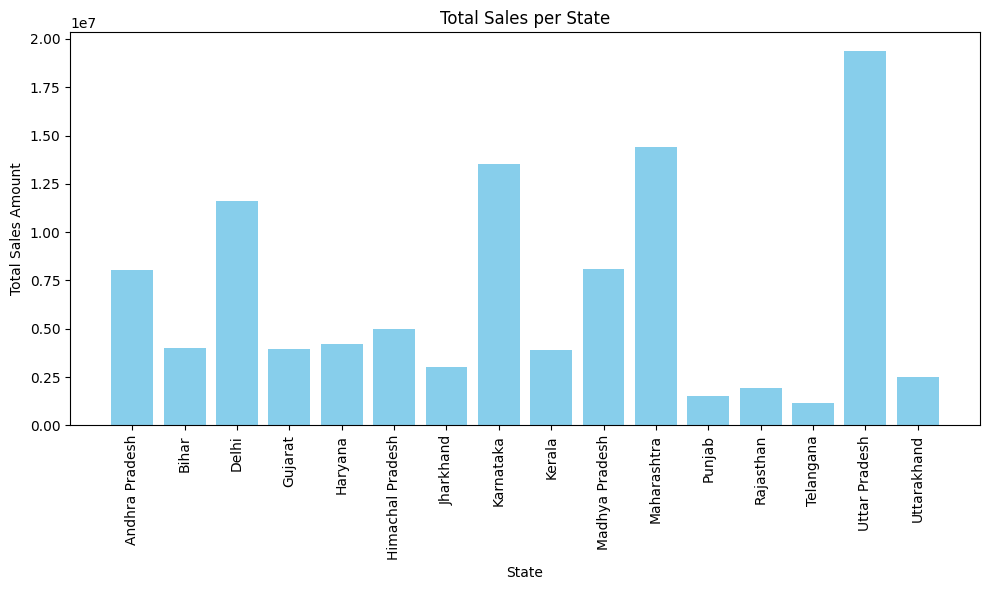

In [15]:
total_sales_per_state = df.groupby('State')['Amount'].sum().reset_index()
total_sales_per_state.columns = ['State', 'Total_Sales']

# Bar chart for total sales by state
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_state['State'], total_sales_per_state['Total_Sales'], color='skyblue')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The output presents the total sales amounts for each state in the dataset. Here are some insights:

- **Highest Sales**: Uttar Pradesh has the highest total sales amount at approximately ₹19,374,968, indicating a strong market presence or customer engagement in that region.
- **Second Highest**: Maharashtra follows closely with total sales of ₹14,427,543, also showcasing significant activity.
- **Other Notable States**: Karnataka and Delhi also report high sales figures of ₹13,523,540 and ₹11,603,819.45, respectively, highlighting these states as key contributors to overall sales.
- **Lower Sales States**: States like Punjab and Telangana show lower total sales amounts, with figures of ₹1,525,800 and ₹1,151,490, suggesting potential areas for growth or increased marketing efforts.

This information is valuable for identifying strong markets and those that may require more attention or strategy adjustments.


### Average order value per state

We are calculating the average order value for each state by dividing the total sales amount by the total number of orders. This metric helps to assess customer spending behavior and can indicate how much, on average, customers are willing to spend per order in different regions. Understanding average order value across states can inform pricing strategies, promotional efforts, and resource allocation.



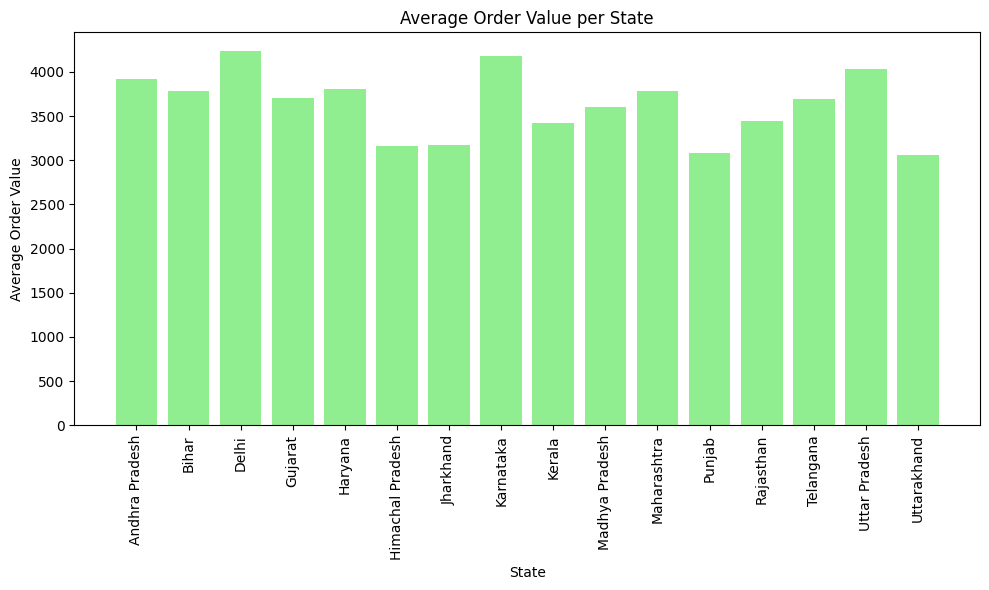

In [16]:
average_order_value = df.groupby('State').agg({'Amount': 'sum', 'Orders': 'sum'}).reset_index()
average_order_value['Average_Order_Value'] = average_order_value['Amount'] / average_order_value['Orders']
average_order_value = average_order_value[['State', 'Average_Order_Value']]

# Bar chart for average order value by state
plt.figure(figsize=(10, 6))
plt.bar(average_order_value['State'], average_order_value['Average_Order_Value'], color='lightgreen')
plt.title('Average Order Value per State')
plt.xlabel('State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
average_order_value

,State,Average_Order_Value
0,Andhra Pradesh,3918.647972
1,Bihar,3787.906780
2,Delhi,4234.970602
3,Gujarat,3701.765478
4,Haryana,3805.387737
5,Himachal Pradesh,3165.413265
6,Jharkhand,3175.714586
7,Karnataka,4173.932099
8,Kerala,3425.234820
9,Madhya Pradesh,3597.309947


#### Insights on average order value per state

1. **Highest Average Order Value**: Delhi has the highest average order value at approximately ₹4,235, indicating that customers in this state tend to spend more per order compared to other regions. This may suggest a higher purchasing power or a preference for premium products.

2. **Lowest Average Order Value**: Uttarakhand has the lowest average order value at around ₹3,059. This could indicate budget-conscious spending habits among consumers in this state or a lower average price point for products sold.

3. **Mid-range Values**: States like Andhra Pradesh and Karnataka show average order values close to ₹3,919 and ₹4,174, respectively. This suggests that these regions have a healthy level of consumer spending, which can be leveraged for targeted marketing strategies.

4. **Consistency Across States**: Most states have average order values ranging from ₹3,000 to ₹4,300, indicating a relatively consistent spending behavior among consumers across different regions, with minor fluctuations based on local market conditions.

5. **Opportunity for Growth**: The average order values in states like Himachal Pradesh and Jharkhand are lower (around ₹3,165 and ₹3,176). This presents an opportunity for businesses to explore strategies to increase the average transaction size, such as promotions or bundling offers.


### Orders by gender

In this analysis, we are calculating the total number of orders placed by each gender in the dataset. This helps us understand the distribution of purchasing activity across different gender demographics. By visualizing this information in a pie chart, we can easily identify the proportion of orders contributed by each gender, which can inform targeted marketing strategies and product offerings.


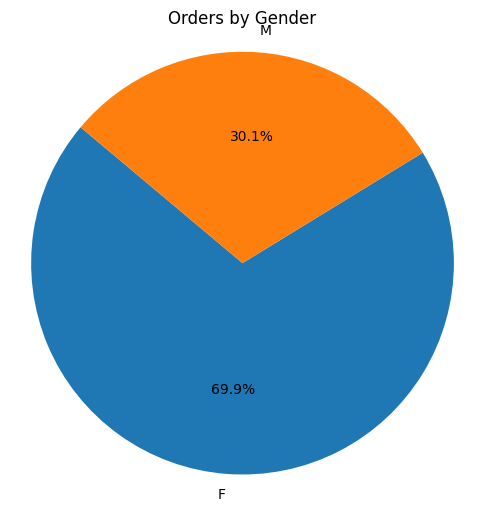

In [18]:
# Orders by Gender
orders_by_gender = df.groupby('Gender')['Orders'].sum().reset_index()

# Pie chart for orders by gender
plt.figure(figsize=(6, 6))
plt.pie(orders_by_gender['Orders'], labels=orders_by_gender['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Orders by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#### Key insights
The data reveals that female customers (F) made significantly more orders (19,548) than male customers (M) with 8,433 orders. This indicates stronger purchasing engagement from females, suggesting that marketing strategies could be tailored to better target this demographic.


### Orders by age group

We are analyzing the number of orders placed by different age groups to understand customer engagement across various demographics. This helps identify which age segments contribute most to total orders, informing targeted marketing strategies.


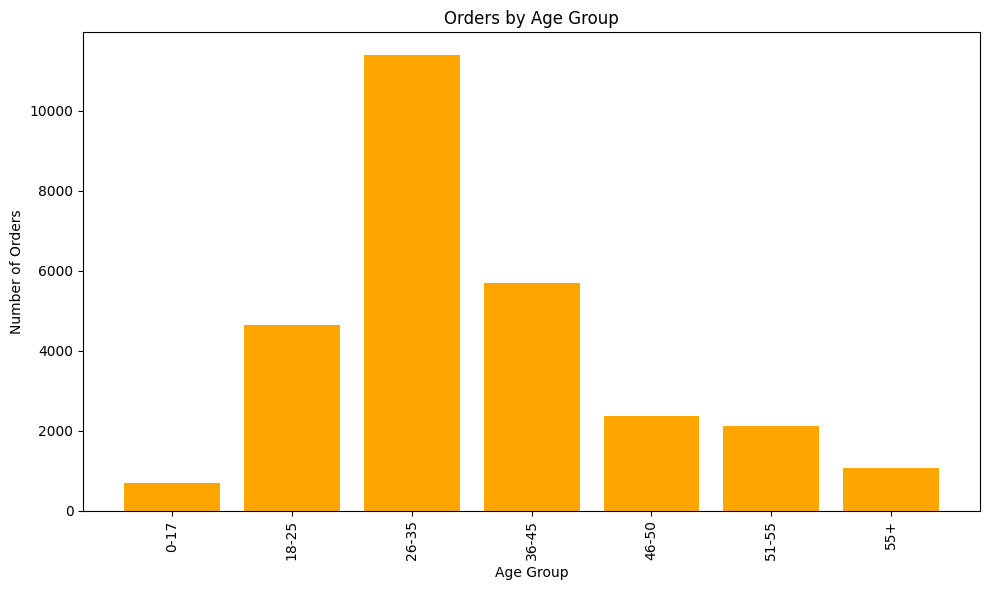

In [19]:
# Orders by Age Group
orders_by_age_group = df.groupby('Age Group')['Orders'].sum().reset_index()

# Bar chart for orders by age group
plt.figure(figsize=(10, 6))
plt.bar(orders_by_age_group['Age Group'], orders_by_age_group['Orders'], color='orange')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Insights from orders by age group

The orders distribution across age groups reveals that:

- The **26-35 age group** is the largest contributor to orders, indicating strong purchasing power and engagement.
- **Young adults (18-25)** also show notable activity, suggesting opportunities for trend-driven marketing.
- Orders from **middle-aged groups (36-45)** reflect a steady market presence, while older segments (46+) exhibit lower engagement, highlighting potential areas for targeted marketing efforts.
- Overall, focusing on the younger and middle-aged demographics could enhance sales and customer retention strategies.


### Analysis of top-selling products

In this analysis, we are identifying the best-selling products based on the total number of orders. By aggregating the order counts for each product, we can pinpoint which items are driving sales and customer engagement. This insight helps in inventory management, marketing strategies, and product promotions.

### Insights from top-selling products

- The **top-selling products** highlight significant customer preferences and trends, which can inform future inventory and marketing decisions.
- Understanding which products lead in sales can help in optimizing stock levels and identifying potential areas for product promotions.
- If certain products consistently rank high in orders, consider expanding related product lines or creating bundled offers to further enhance sales.


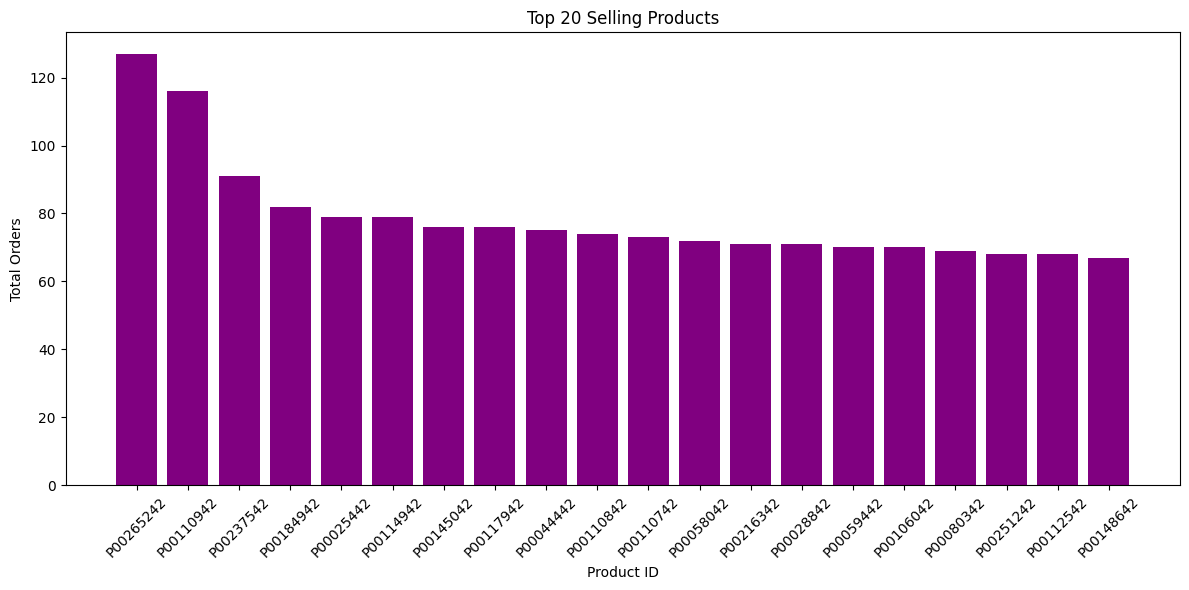

In [20]:
# Top-selling products
top_products = df.groupby('Product_ID')['Orders'].sum().reset_index()
top_products.columns = ['Product_ID', 'Total_Orders']
top_products = top_products.sort_values(by='Total_Orders', ascending=False)

# Get the top 29 products
top_20_products = top_products.head(20)

# Bar chart for top-selling products
plt.figure(figsize=(12, 6))
plt.bar(top_20_products['Product_ID'], top_20_products['Total_Orders'], color='purple')
plt.title('Top 20 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights from top-selling products output

1. **Top Product Performance**: The product with **ID P00265242** leads with **127 orders**, indicating strong demand and potentially effective marketing or popularity among customers.
   
2. **Consistent Demand**: Several products, such as **P00110942** and **P00237542**, have also shown significant order volumes (**116** and **91** orders, respectively), suggesting that they are well-received by customers.

3. **Order Volume Distribution**: The top 20 products have order totals ranging from **67 to 127**, highlighting a competitive landscape where even the lowest-selling products in this group are still generating substantial interest.

4. **Strategic Focus**: Identifying these top products can guide strategic decisions such as increasing stock levels, enhancing visibility through targeted marketing, or exploring potential collaborations with suppliers.


### Sales by product category analysis

We are aggregating sales data by product category to understand which categories generate the most orders and revenue. This analysis provides insights into consumer preferences and helps identify categories that may require more marketing focus or inventory adjustments. 


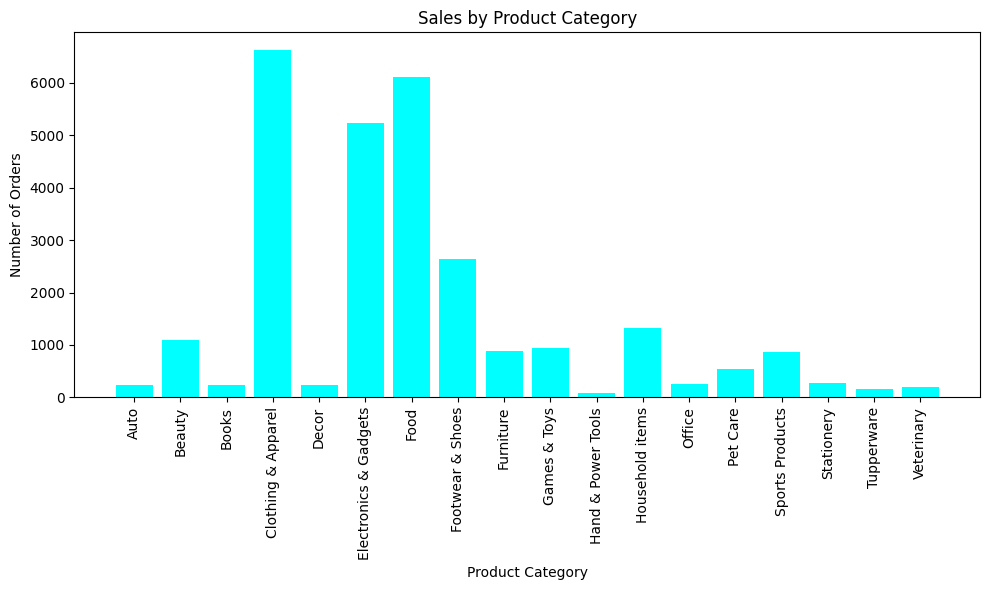

In [21]:
# Sales by Product Category
sales_by_category = df.groupby('Product_Category').agg({'Orders': 'sum', 'Amount': 'sum'}).reset_index()

# Bar chart for sales by product category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['Product_Category'], sales_by_category['Orders'], color='cyan')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Insights from sales by product category output

1. **Food** leads in both orders (6,110) and revenue (\$33.9M), showing strong consumer demand.
2. **Electronics & Gadgets** (5,226 orders, \$15.6M) and **Clothing & Apparel** (6,634 orders, \$16.5M) also perform well, indicating popular consumer interests.
3. **Footwear & Shoes** generates substantial sales (\$15.6M) with 2,646 orders.
4. **Beauty** (1,086 orders, \$1.96M) and **Sports Products** (870 orders, \$3.6M) show potential for growth.
5. Categories like **Auto** (239 orders, \$1.96M) and **Hand & Power Tools** (80 orders, \$405K) are underperforming and may need targeted marketing.


### Total orders by occupation

We are analyzing the distribution of total orders across different occupations to understand consumer behavior and preferences. This information can help tailor marketing strategies to target specific occupational groups effectively.


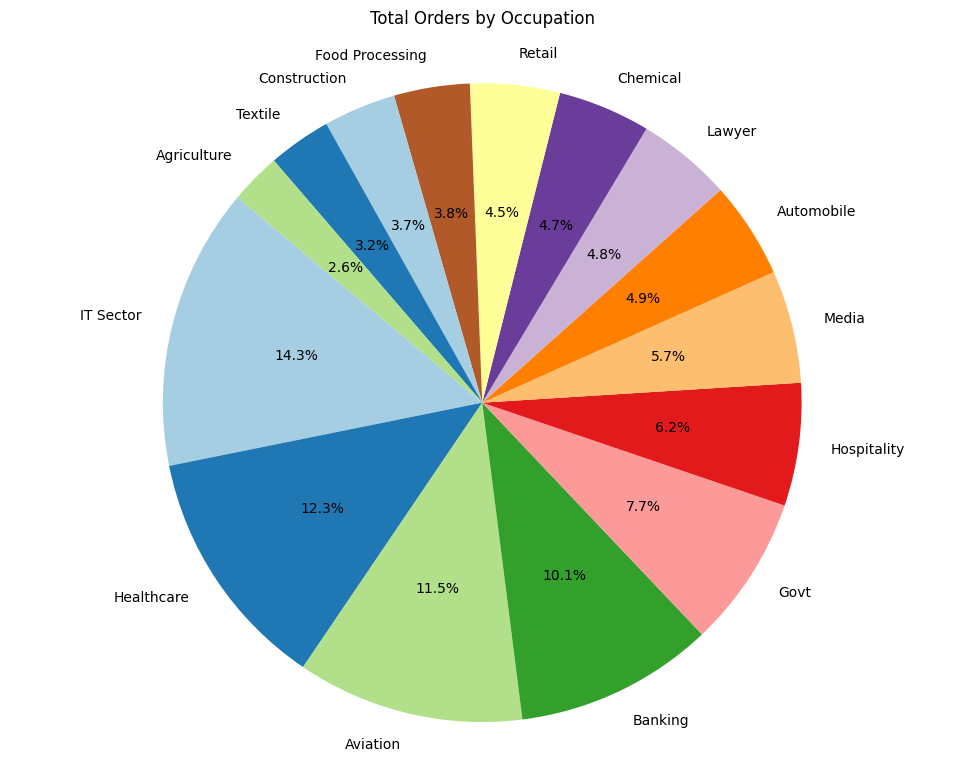

In [22]:
occupation_orders = df.groupby('Occupation')['Orders'].sum().reset_index()
occupation_orders.columns = ['Occupation', 'Total_Orders']

# Sort values by Total Orders
occupation_orders = occupation_orders.sort_values(by='Total_Orders', ascending=False)

# Pie chart for orders by occupation
plt.figure(figsize=(10, 8))
plt.pie(
    occupation_orders['Total_Orders'], 
    labels=occupation_orders['Occupation'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title('Total Orders by Occupation', pad=20)  # Add padding to title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(pad=2)  # Add some padding around the plot

plt.show()

The analysis of total orders by occupation reveals the following insights:

- **IT Sector** leads with the highest number of orders (3,997), indicating a strong consumer engagement in technology-related products or services.
- **Healthcare** and **Aviation** follow closely, with orders of 3,455 and 3,215, respectively, highlighting significant demand in these critical sectors.
- Other notable occupations include **Banking** (2,817), **Government** (2,155), and **Hospitality** (1,739), each demonstrating considerable order volumes.
- Occupations such as **Retail** (1,270) and **Construction** (1,025) also contribute to the overall order count, suggesting diverse consumer interests across various fields.


### Order distribution

In this analysis, we visualize the distribution of the number of orders placed using a histogram combined with a kernel density estimate (KDE). This helps us understand customer purchasing behavior, particularly the frequency of different order sizes.



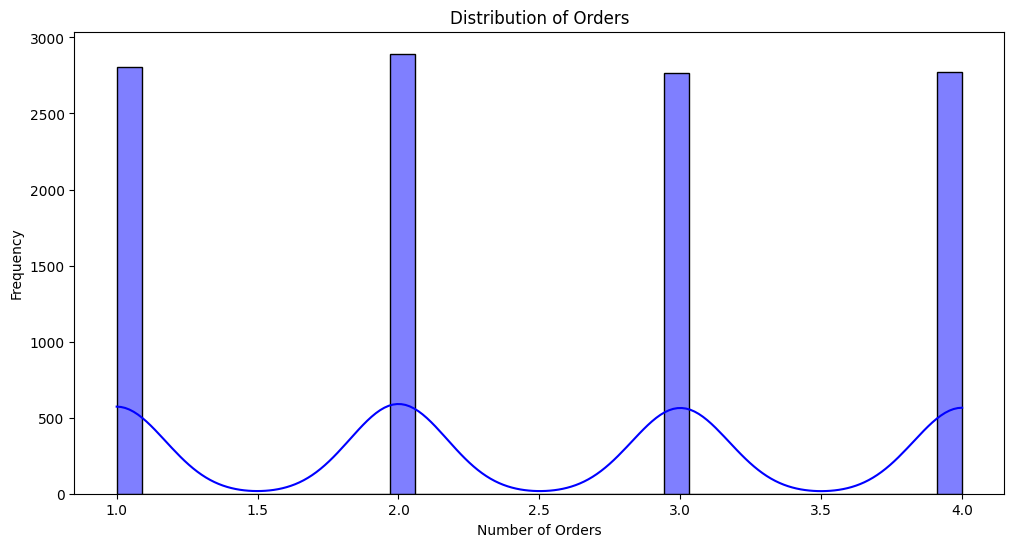

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Orders'], kde=True, color='blue')
plt.title('Distribution of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

### Insights from order count data

1. **Popular Order Size**: The most common order size consists of 2 orders, accounting for 2,893 instances. This suggests that many customers prefer ordering multiple items in a single transaction.
2. **Balanced Distribution**: The counts for orders of 1 (2,808), 3 (2,765), and 4 (2,773) indicate a relatively balanced distribution of order sizes, reflecting diverse customer preferences.
3. **Focus on Order Optimization**: Given that most orders fall between 1 to 4 items, strategies to encourage larger order sizes, such as bundle offers or discounts on higher quantities, could effectively increase sales.


### Amount distribution

We are visualizing the distribution of transaction amounts in our dataset to understand the spending behavior of customers. This histogram will help identify common spending ranges and any potential outliers that may exist in the data. The addition of a Kernel Density Estimate (KDE) curve provides a smoother representation of the distribution, allowing for better insights into the data's underlying patterns.


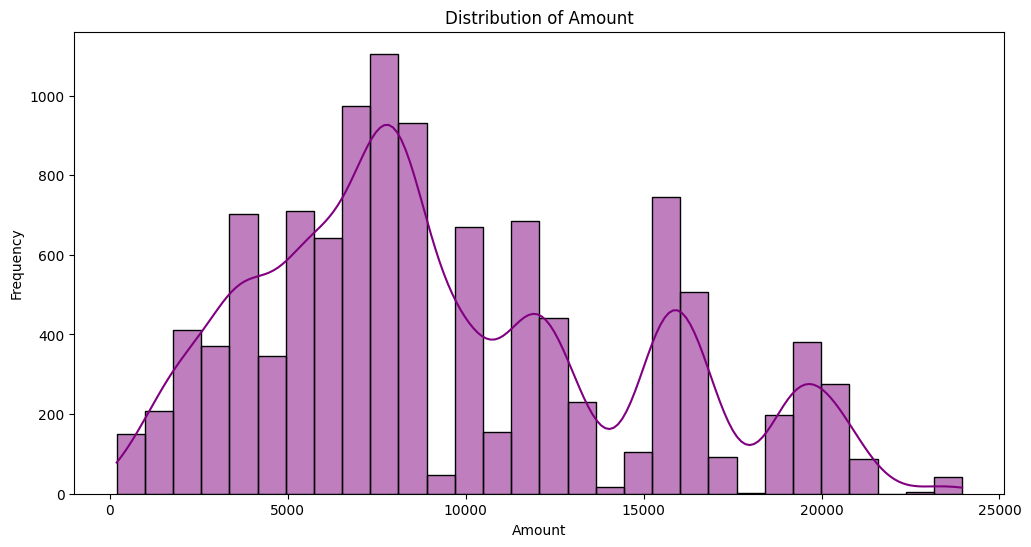

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Correlation heatmap

We are generating a correlation heatmap to visualize the relationships between various numeric columns in our dataset, including Age, Marital Status, Orders, and Amount. This heatmap will help us identify potential correlations, such as how age or marital status may influence order volume and spending amounts. Understanding these relationships can guide our analysis and inform marketing strategies.


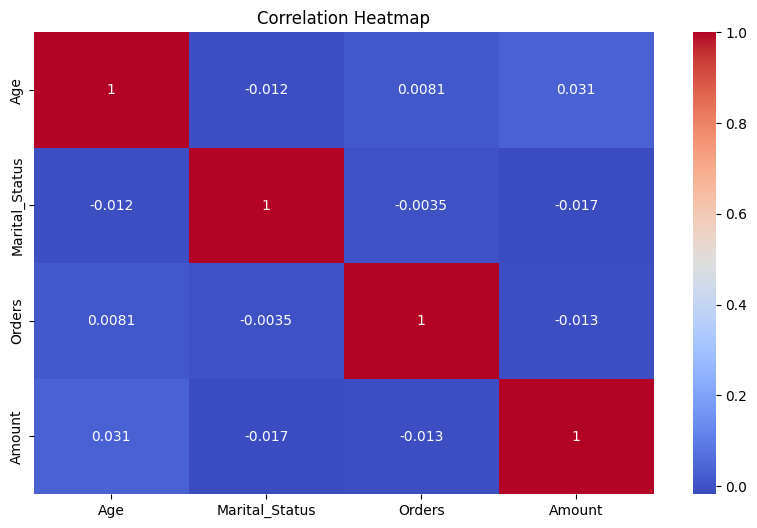

In [25]:
numeric_columns = ['Age', 'Marital_Status', 'Orders', 'Amount']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Key insights
The correlation heatmap indicates weak relationships among Age, Marital Status, Orders, and Amount, with all coefficients near zero. Age shows a slight positive correlation (0.031) with Amount, suggesting older customers may spend marginally more. Overall, these variables do not significantly influence each other, indicating that other factors may drive sales and order frequency.



### Total count of each gender based on marital status

This bar chart visualizes the distribution of orders based on marital status and gender. It shows that **Married** individuals place more orders than those who are **Not Married**, with **Females** particularly leading in the **Married** category. This insight can inform targeted marketing strategies to engage these demographics effectively, especially during festive occasions.


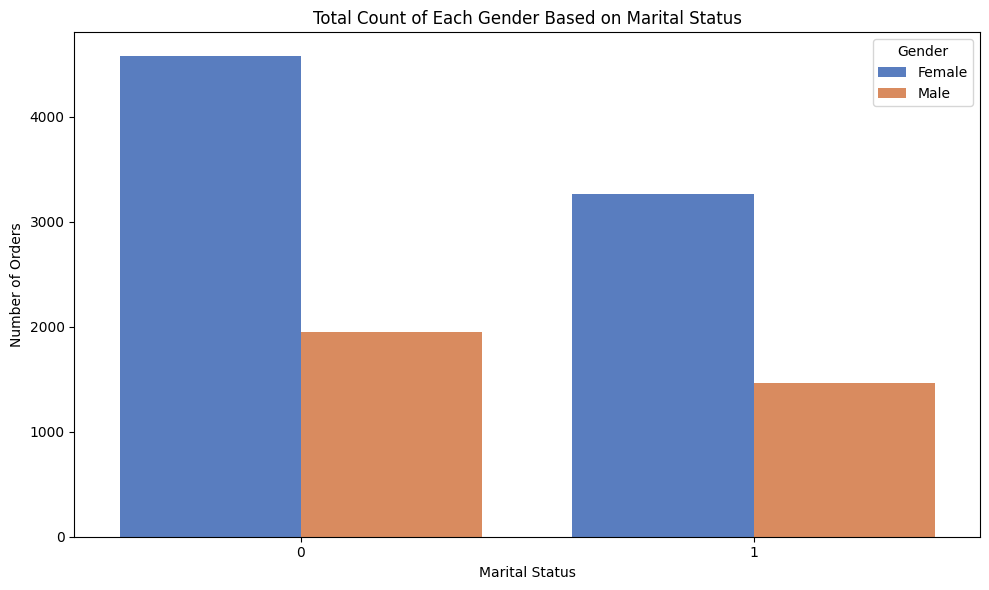

In [26]:
ms = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='counts').sort_values('counts', ascending=False)

# Replace values for better readability
ms['Marital_Status'] = ms['Marital_Status'].replace({'0': 'Not Married', '1': 'Married'})
ms['Gender'] = ms['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=ms, x='Marital_Status', y='counts', hue='Gender', palette='muted')

# Update layout for better aesthetics
plt.title("Total Count of Each Gender Based on Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.tight_layout()

# Show the figure
plt.show()

#### Key insights

The data indicates that Females are more active in placing orders compared to Males, regardless of marital status. Specifically, 4,573 orders were recorded from Not Married Females, while 1,945 orders were placed by Not Married Males. Among Married individuals, 3,259 orders were attributed to Married Females, compared to 1,462 orders from Married Males. This suggests a strong engagement from female customers, particularly those who are not married, presenting an opportunity for targeted marketing strategies.








### Box plot of order amounts by state

This analysis explores the distribution of order amounts across different states. Using a box plot, we can observe the spread of order values, including medians and outliers, which helps in identifying any states with particularly high or low order amounts. This visualization can guide regional strategies by highlighting states with significant spending patterns.


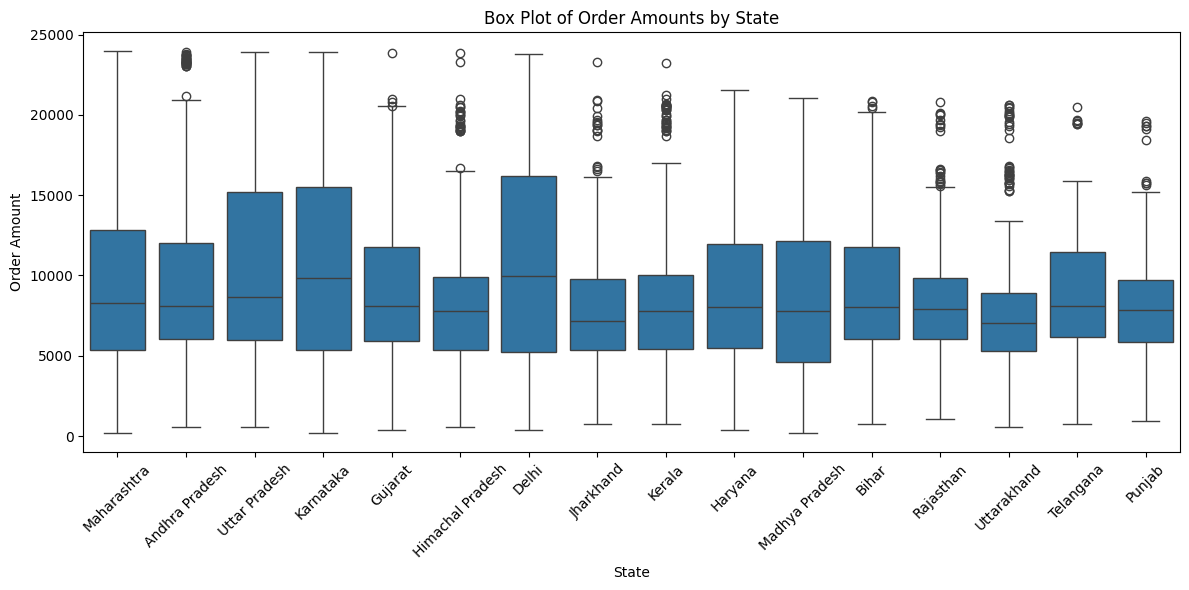

In [27]:
# Box plot for Amount by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Amount', data=df)
plt.title('Box Plot of Order Amounts by State')
plt.xlabel('State')
plt.ylabel('Order Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights

The box plot reveals significant variations in order amounts across different states:

- **Maharashtra and Karnataka** show higher median order amounts, indicating potentially stronger purchasing power or higher-value orders in these states.
- **Uttar Pradesh and Gujarat** also have high maximum order values, though their median values are lower than Maharashtra.
- **States like Jharkhand, Kerala, and Punjab** show relatively lower order amounts overall, with smaller spreads, indicating more consistent but lower-value purchases.
- Several states have **outliers**, suggesting occasional high-value orders, which could indicate specific segments of affluent customers or bulk orders in those regions.


### Orders by age group and product category

This analysis aims to identify **purchasing trends across different age groups and product categories**. By visualizing the total orders, we can understand which age groups favor certain categories, allowing for more targeted marketing and product recommendations.


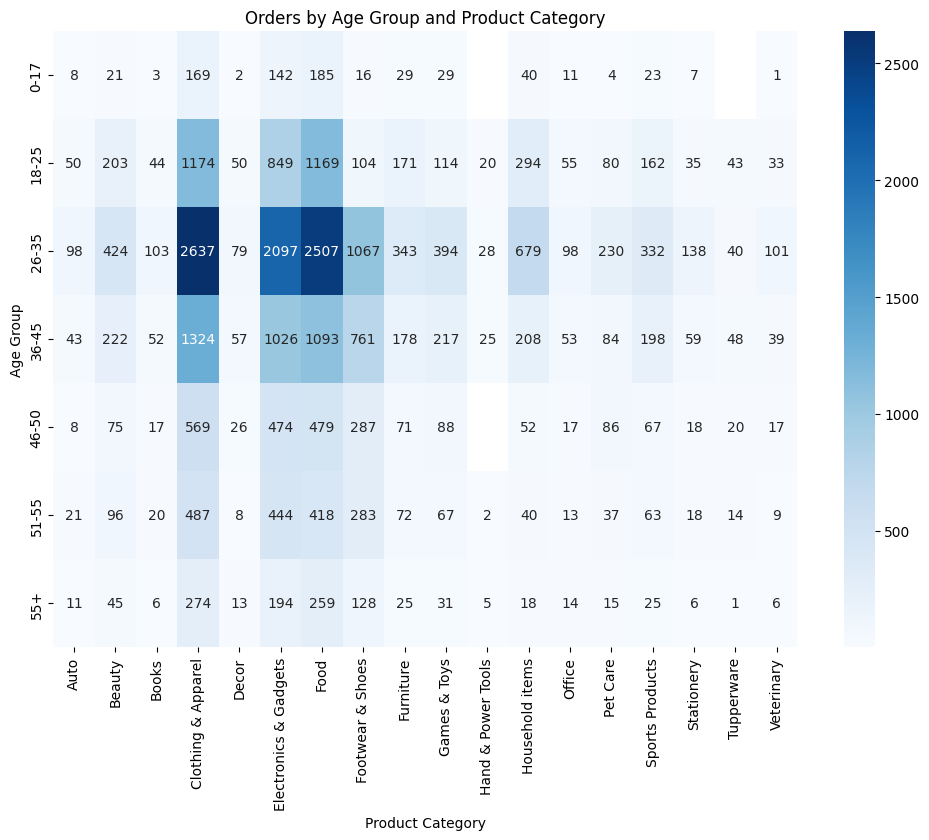

In [28]:
# Group by Age Group and Product Category
multi_group_orders = df.groupby(['Age Group', 'Product_Category'])['Orders'].sum().unstack()

# Heatmap for multivariate analysis
plt.figure(figsize=(12, 8))
sns.heatmap(multi_group_orders, cmap='Blues', annot=True, fmt='g')
plt.title('Orders by Age Group and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

### Total orders by zone

In this section, we analyze the total number of orders segmented by different zones in our dataset. We first group the data by the Zone column and sum the Orders for each zone to obtain the total number of orders per zone. This aggregated data is then visualized using a grouped bar chart, which allows us to easily compare the total orders across various zones.


/tmp/ipykernel_299/747323629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_orders, x='Zone', y='Total_Orders', palette='viridis')


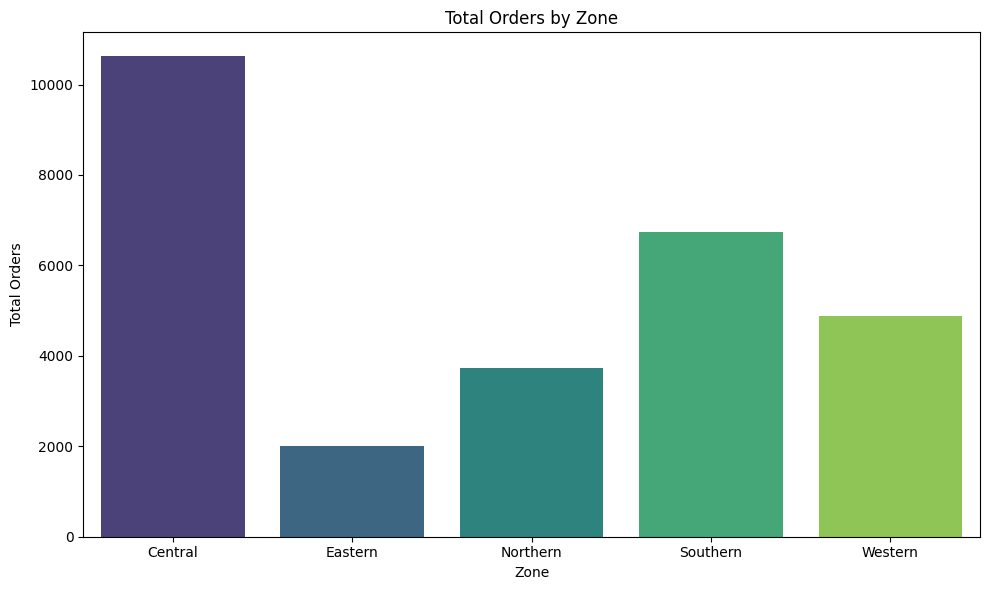

In [29]:
zone_orders = df.groupby('Zone')['Orders'].sum().reset_index()
zone_orders.columns = ['Zone', 'Total_Orders']

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_orders, x='Zone', y='Total_Orders', palette='viridis')

# Update layout for better aesthetics
plt.title("Total Orders by Zone")
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()

# Show the figure
plt.show()

#### Key insights

1. **Central Zone Dominance**: The Central zone leads with **10,623** orders, indicating strong engagement and spending during Diwali.

2. **Low Engagement in Eastern Zone**: The Eastern zone's **2,015** orders suggest potential cultural differences or market challenges.

3. **Diverse Regional Practices**: Northern (**3,727**) and Southern (**6,740**) zones show moderate participation, indicating varied Diwali observances.

4. **Logistics Focus**: Concentrated orders in the Central zone highlight the need for efficient supply chain management to meet high demand.

5. **Tailored Marketing**: Localized marketing strategies can enhance appeal and drive sales by aligning with regional customs and preferences.


### Total sales amount by product category

In this analysis, we are aggregating the total sales amounts for each product category to identify trends in sales performance during Diwali.


/tmp/ipykernel_299/1448006552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Product_Category', y='Total_Sales', palette='viridis')


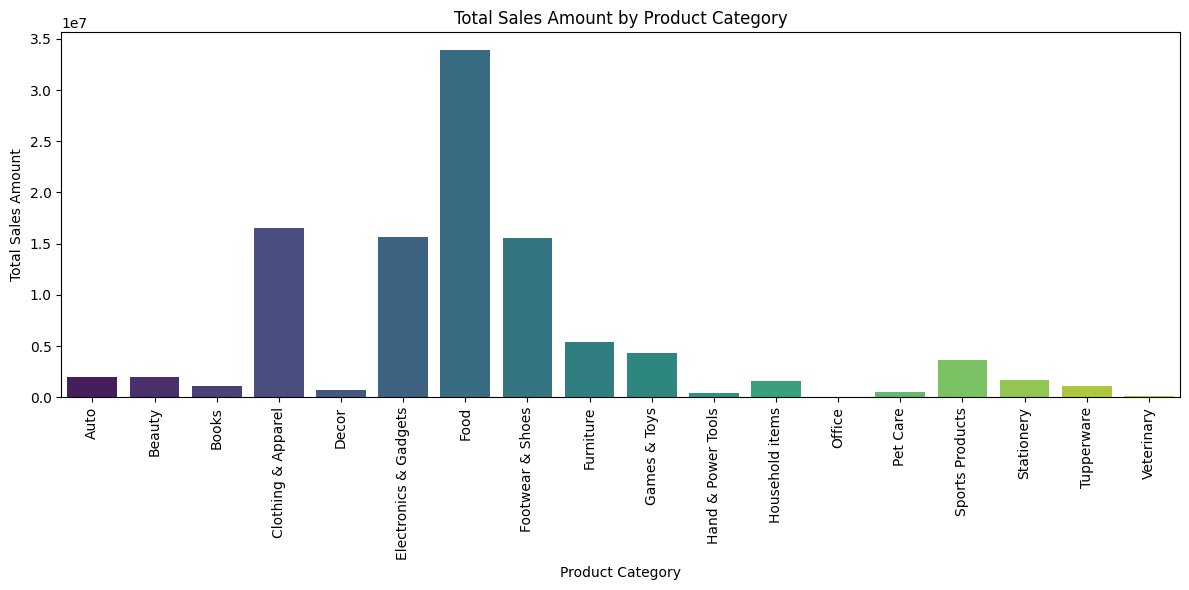

In [30]:
category_sales = df.groupby('Product_Category')['Amount'].sum().reset_index()
category_sales.columns = ['Product_Category', 'Total_Sales']

# Bar chart for total sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Product_Category', y='Total_Sales', palette='viridis')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Key insights from total sales by product category during Diwali

1. **Top Category - Food**: Leads with ₹33,933,883.50, reflecting high demand for festive treats.
2. **Strong Electronics Sales**: Generated ₹15,643,846, showing popularity for tech gifts.
3. **Clothing & Apparel**: Achieved ₹16,495,019 in sales, indicating a trend towards new attire for celebrations.
4. **Footwear Demand**: Totaling ₹15,575,209.45, suggesting shoppers prioritize stylish footwear.
5. **Underperforming Categories**: Office supplies (₹81,936) and veterinary products (₹112,702) show low interest, signaling a need for revised marketing.
